# Intel Image Classification

In this project, we will be working on Intel images i.e. images of buildings, forest, street, etc. We will built a convolutional neural network and train it on this images. This is a multi class classification problem and we will use Keras.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

First we will mount our google drive on colab so that we can use the dataset directly from our drive. For this you first need to upload the data on your drive and then mount the drive on colab.

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

After mounting our drive we will locate the folder where our data is stored to use it in our colab notebook. Here we will see all the folders I have in my drive and 'Intel Image Dataset' contains the images that we will work on.

In [1]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU,ReLU
from sklearn.model_selection import train_test_split

We will start by importing some required libraries.

In [ ]:
# Listing directory
!ls "/content/drive/My Drive/Intel Image Dataset/Intel Image Dataset"

We will check for folders of class images.

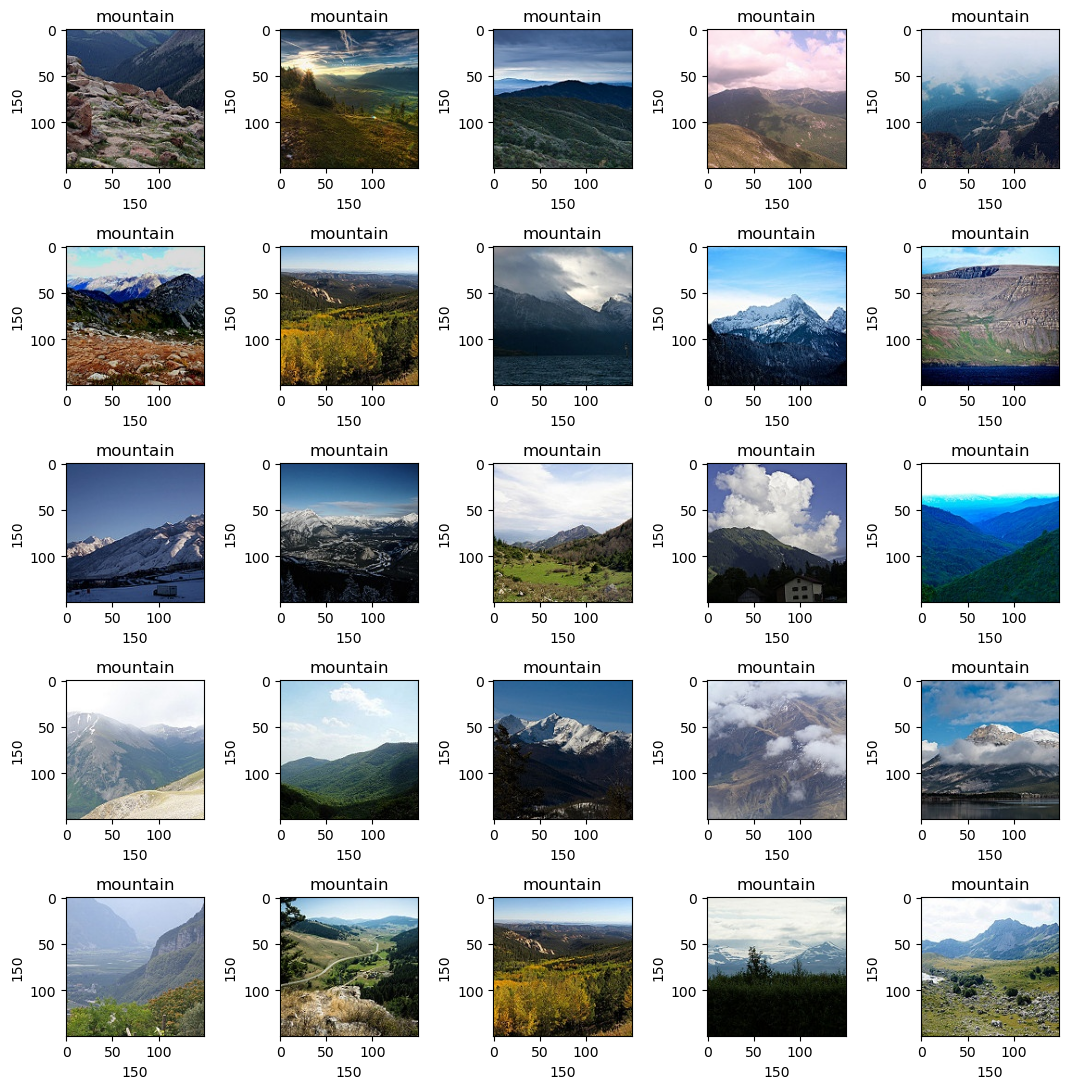

In [3]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "Data/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice((listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[0], fontsize = 10)
    plt.ylabel(rand_img.shape[1], fontsize = 10)

Let's visualize some of the mountain images that we will be working on. Also we will observe x and y dimensions of the image.

In [4]:
# Setting root directory path and creating empty list
dir = "Data/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

Setting the root directory for the dataset and storing all the folders name of the dataset. We will also create 2 empty list for image and lables.

In [5]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Next we need to resize images as some of the images don't have same dimensions. So, we will read and resize all the images. Then we will convert it into array and appending the list created above with the image and its label.

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
Name: count, dtype: int64

Checking for images per class.

In [7]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

Storing the number of classes which will be used further in model architecture.

In [8]:
# Checking x data shape
np.array(image_list).shape

(3000, 150, 150, 3)

Check the shape of the x data for input layer of model architecture.

In [9]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

Checking the number of labels in y data which should be equal to total number of images.

In [10]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 42) 

Now we will split our dataset into testing and training using train_test_split() from sklearn.

In [11]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

Next we will normalize the images by dividing them with 255 and we will also reshape x_train and x_test data. 

In [12]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [13]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [14]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        ReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        ReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        ReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        ReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        ReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        ReLU(),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

C:\Users\ASIM\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 148, 148, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 146, 146, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 146, 146, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 27, 27, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │              

 Total params: 306,422 (1.17 MB)

 Trainable params: 305,718 (1.17 MB)

 Non-trainable params: 704 (2.75 KB)

Now we will create a network architecture for the model. We have used different types of layers according to their features namely BatchNormalization (Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch), Relu,Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [15]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])

For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics. Here we will use loss as categorical_crossentropy, optimizer as Adam and metrics as accuracy.

In [16]:
# Training the model
#epochs = 70
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 64s 934ms/step - accuracy: 0.2583 - loss: 1.7665 - val_accuracy: 0.2167 - val_loss: 1.8600
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 56s 930ms/step - accuracy: 0.4286 - loss: 1.4151 - val_accuracy: 0.2042 - val_loss: 2.0540
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 915ms/step - accuracy: 0.5358 - loss: 1.2317 - val_accuracy: 0.1750 - val_loss: 2.1578
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 920ms/step - accuracy: 0.6389 - loss: 1.0635 - val_accuracy: 0.1833 - val_loss: 2.2498
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 922ms/step - accuracy: 0.6954 - loss: 0.9434 - val_accuracy: 0.2750 - val_loss: 1.9008
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 57s 950ms/step - accuracy: 0.7155 - loss: 0.8481 - val_accuracy: 0.4104 - val_loss: 1.6518
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 56s 930ms/step - accuracy: 0.7381 - loss: 0.8094 - val_accuracy: 0.6417 - val_loss: 0.9614
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 55s 922ms/step - accuracy: 0.7670 - loss: 0.7318 - val_accu

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 70 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [17]:
# Saving model
model.save("intel_image_0.h5")

We will save the model using model.save() to use it later for prediction.

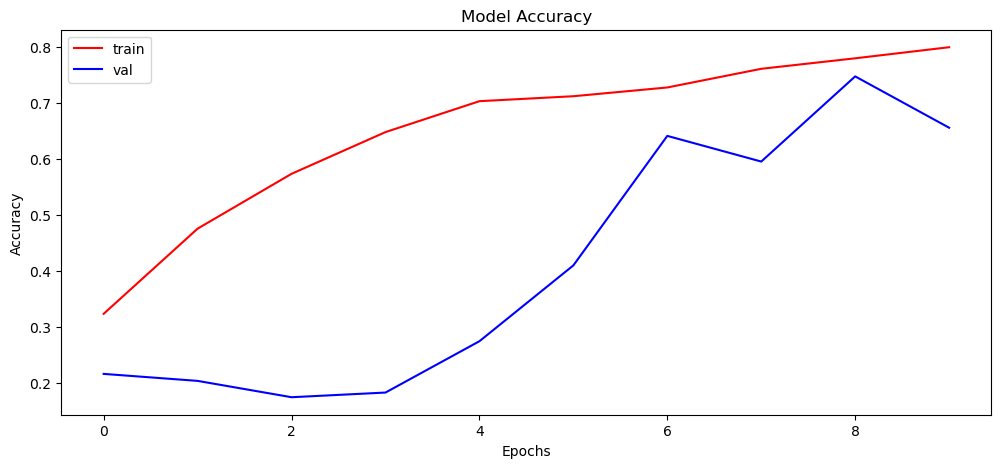

In [18]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.



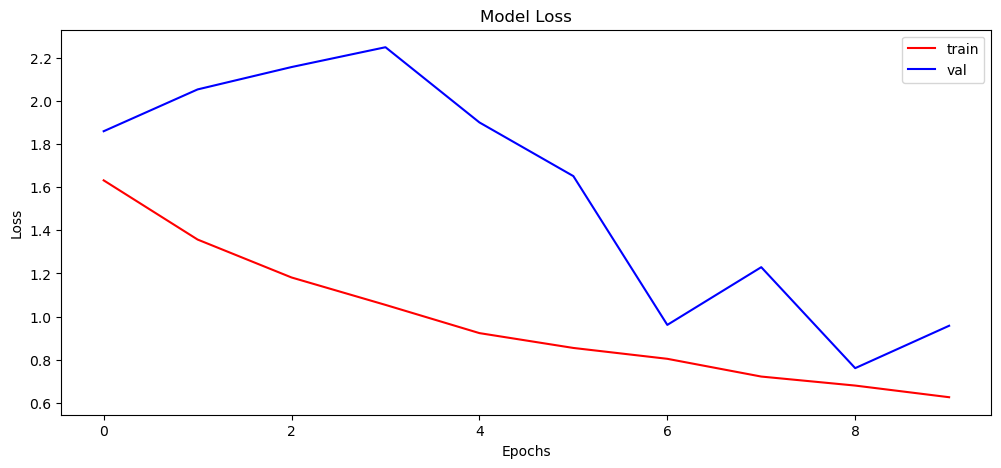

In [19]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the loss of the model for the training history.



In [20]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5882 - loss: 1.0415
Test Accuracy: 63.66666555404663


Evaluating the model to know the accuracy of the model on the test data.

In [21]:
# Storing model predictions
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step


In [22]:
y_predict=[np.argmax(i) for i in y_pred]
y_predict[:]


[4,
 4,
 3,
 4,
 5,
 0,
 4,
 4,
 4,
 5,
 4,
 4,
 1,
 3,
 4,
 1,
 2,
 1,
 5,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 2,
 3,
 1,
 4,
 0,
 1,
 4,
 3,
 5,
 3,
 4,
 1,
 4,
 1,
 2,
 4,
 4,
 5,
 5,
 2,
 4,
 1,
 4,
 4,
 4,
 5,
 4,
 1,
 0,
 3,
 1,
 1,
 1,
 5,
 1,
 2,
 4,
 2,
 2,
 1,
 4,
 5,
 0,
 3,
 4,
 1,
 4,
 5,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 0,
 5,
 2,
 4,
 5,
 4,
 3,
 4,
 2,
 4,
 0,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 3,
 1,
 2,
 4,
 4,
 4,
 5,
 1,
 5,
 3,
 1,
 4,
 4,
 0,
 4,
 3,
 5,
 4,
 1,
 3,
 2,
 4,
 4,
 1,
 1,
 2,
 4,
 2,
 3,
 3,
 2,
 0,
 4,
 4,
 4,
 4,
 1,
 2,
 3,
 5,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 5,
 2,
 4,
 4,
 3,
 5,
 5,
 4,
 5,
 3,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 5,
 5,
 4,
 1,
 5,
 4,
 4,
 3,
 1,
 3,
 4,
 4,
 3,
 5,
 4,
 5,
 4,
 4,
 2,
 4,
 1,
 4,
 3,
 4,
 4,
 5,
 4,
 5,
 1,
 5,
 2,
 4,
 4,
 5,
 3,
 2,
 4,
 4,
 1,
 4,
 4,
 4,
 2,
 4,
 1,
 4,
 4,
 0,
 3,
 4,
 4,
 3,
 1,
 5,
 4,
 1,
 0,
 4,
 4,
 5,
 2,
 3,
 4,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 4,
 1,
 4,
 4,
 0,
 1,
 4,
 1,
 1,
 5,


Generating predictions for test data and storing them into y_pred.

In [23]:
# Plotting image to compare
#from tensorflow.keras.preprocessing.image import array_to_image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array


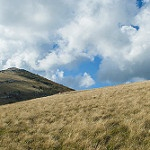

In [24]:
# Plotting image to compare
img = array_to_img(x_test[45])
img

Visualizing an image to be predicted in further steps.

In [25]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[45])])
print("Predicted : ",labels[np.argmax(y_pred[45])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  mountain
Predicted :  sea


Now, we will create list of labels using object of label binarizer. We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

## Conclusion:

In this project we saw how we can create a CNN using different layers. Normalizing is an important step when working with any type of dataset. We will use this model to predict the class of the image supplied to the model.

## Data Augmentaion

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=40,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Horizontal flip
    fill_mode='nearest'      # Fill missing pixels
)

# For the validation and test sets, we only rescale the images
#validation_datagen = ImageDataGenerator(rescale=1./255)

# Loading the dataset (assuming it's already split into train/validation/test)
train_generator = train_datagen.flow_from_directory(
    'Data/Intel Image Dataset',  # Path to the train dataset
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='categorical'
)


Found 3000 images belonging to 6 classes.


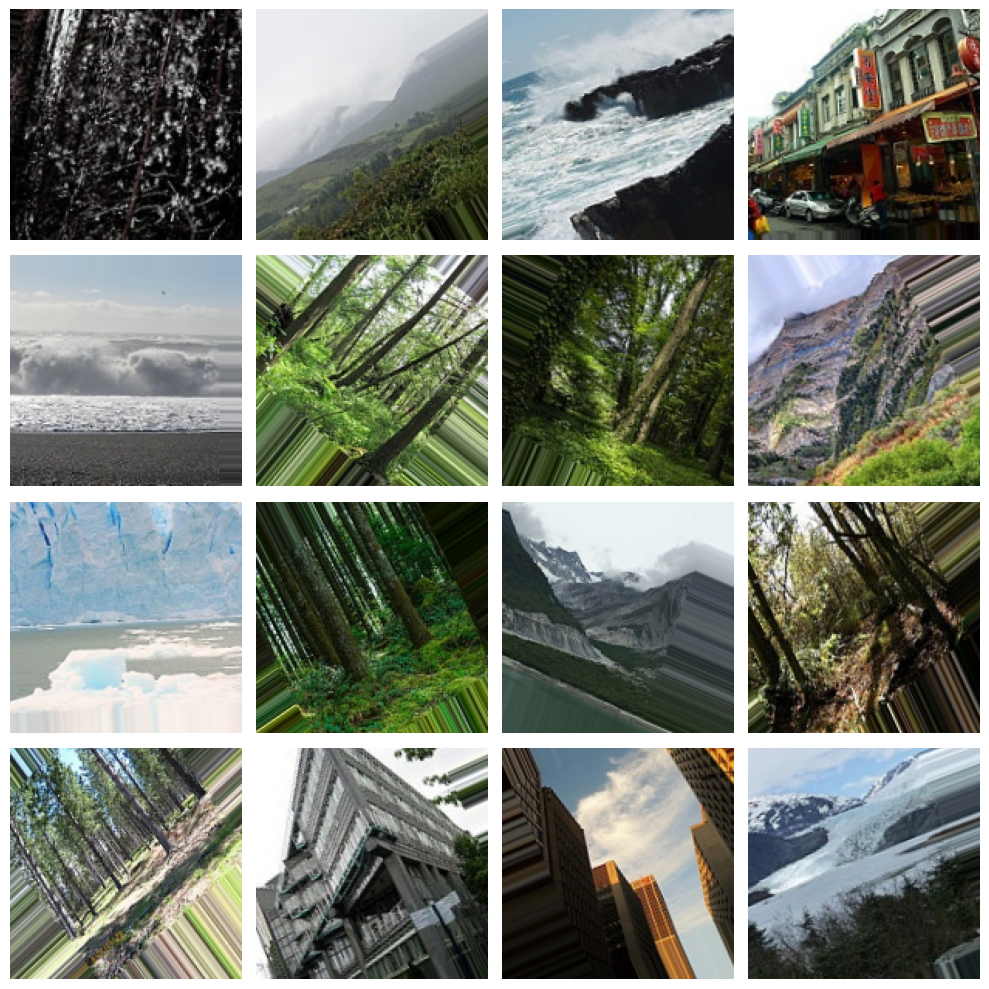

In [27]:
# Function to visualize the effects of augmentation
def visualize_augmentation(generator, num_images=16):
    # Get a batch of images and labels
    images, labels = next(generator)
    
    # Set up the plot
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])  # Display augmented image
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to visualize augmentation
visualize_augmentation(train_generator)

## VGG16 Pre-trained Model

![VGG](vgg.jpg) 

In [28]:
from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [29]:
vgg = VGG16(weights='imagenet')

In [30]:
img_path = 'car.jpg'
img = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [31]:
preds = vgg.predict(x)
print('Predict: ',decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predict:  [('n03770679', 'minivan', 0.6983079), ('n02814533', 'beach_wagon', 0.14183237), ('n04285008', 'sports_car', 0.059880268)]


## VGG16 Pre-trained Model with Fine-tuning on our data

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model with pre-trained weights, exclude top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze all layers in the base VGG16 model (for fine-tuning only later layers)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model_2 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes for Intel image classification
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# View model summary
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
# Train the model
epochs=10
batch_size=32
history_2 = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.3947 - loss: 1.5910 - val_accuracy: 0.7479 - val_loss: 0.6738
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.6516 - loss: 0.8357 - val_accuracy: 0.8000 - val_loss: 0.5513
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.7555 - loss: 0.6467 - val_accuracy: 0.8104 - val_loss: 0.4992
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.7985 - loss: 0.5581 - val_accuracy: 0.8271 - val_loss: 0.4909
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/step - accuracy: 0.8247 - loss: 0.4781 - val_accuracy: 0.8396 - val_loss: 0.4549
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.8480 - loss: 0.4140 - val_accuracy: 0.8188 - val_loss: 0.4992
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.8761 - loss: 0.3492 - val_accuracy: 0.8333 - val_loss: 0.5051
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.8565 - loss: 0.3586 - val_accuracy: 0.8333 - v

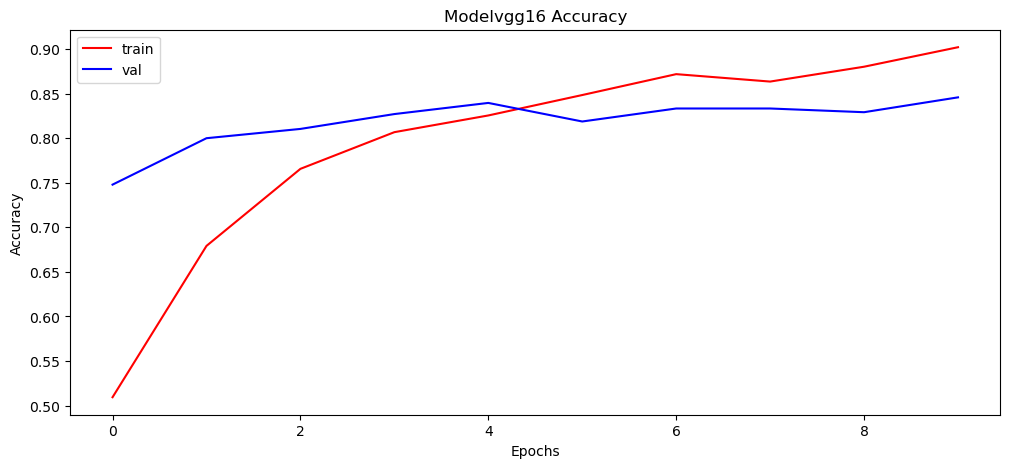

In [34]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['accuracy'], color='r')
plt.plot(history_2.history['val_accuracy'], color='b')
plt.title('Modelvgg16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

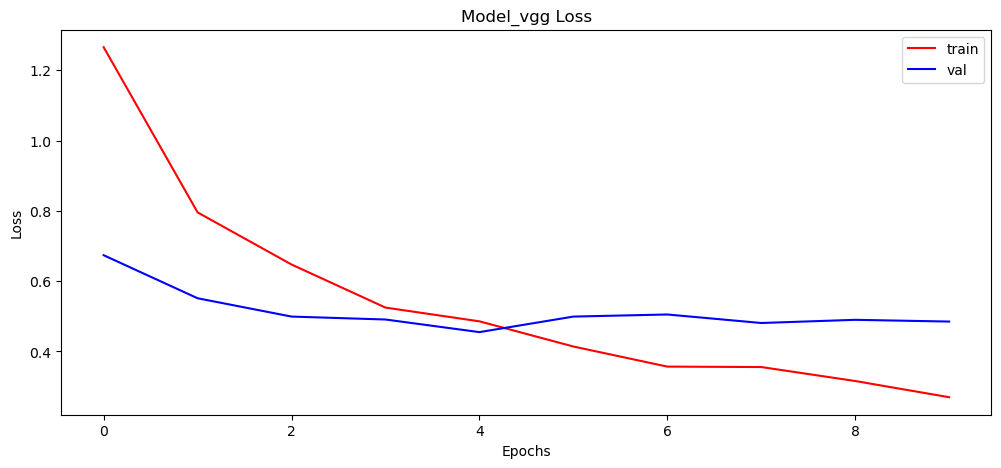

In [35]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['loss'], color='r')
plt.plot(history_2.history['val_loss'], color='b')
plt.title('Model_vgg Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions
Y_pred = model_2.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step


In [37]:
# Convert one-hot encoded y_test (if necessary)
y_true = np.argmax(y_test, axis=1)

In [39]:
# Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       104
           1       0.99      0.99      0.99        97
           2       0.77      0.86      0.81       107
           3       0.82      0.76      0.79       104
           4       0.87      0.85      0.86        93
           5       0.84      0.96      0.90        95

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [45]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

[[83  0  1  0  3 17]
 [ 0 96  0  0  1  0]
 [ 1  1 92  8  5  0]
 [ 0  0 22 79  3  0]
 [ 0  0  5  9 79  0]
 [ 4  0  0  0  0 91]]


In [46]:
# Saving model
model_2.save("intel_image_2.h5")

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = 'bb.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0  # Rescale pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
pred = model_2.predict(img_array)
predicted_class = np.argmax(pred, axis=1)

# Map the predicted class index back to the class label
#class_labels = list(x_train.cl
print(f"Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
Predicted class: 0
